# Lab 9.6.1

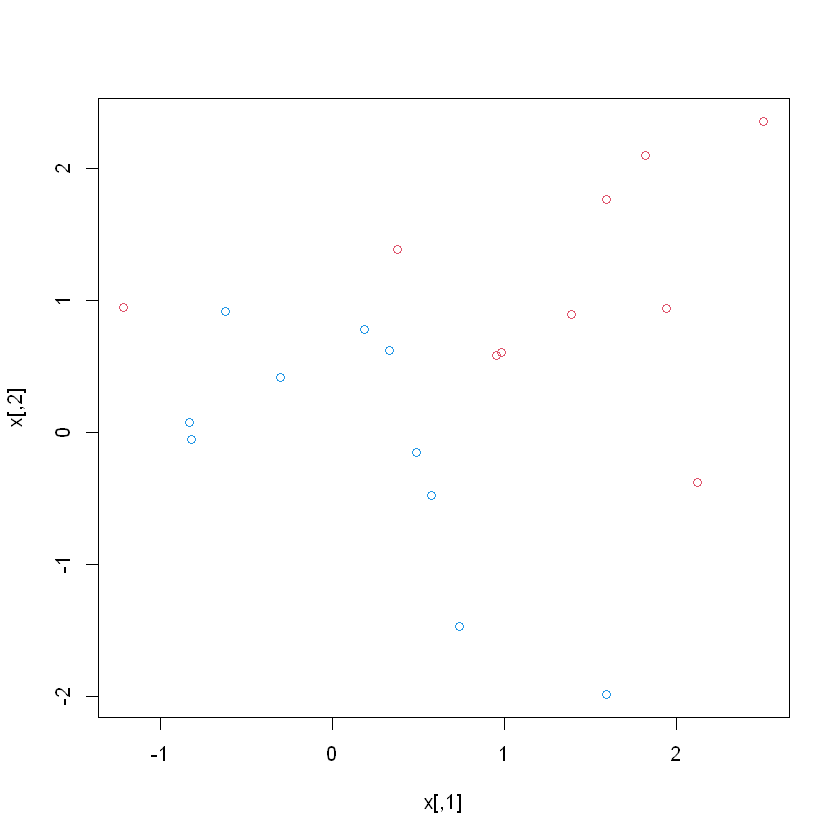

In [1]:
set.seed(1)
x=matrix(rnorm (20*2), ncol=2)
y=c(rep(-1,10), rep(1,10))
x[y==1,]=x[y==1,] + 1
plot(x, col=(3-y))

In [4]:
dat=data.frame(x=x, y=as.factor(y))
library("e1071")
svmfit = svm(y~., data=dat , kernel ="linear", cost=10,scale=FALSE)

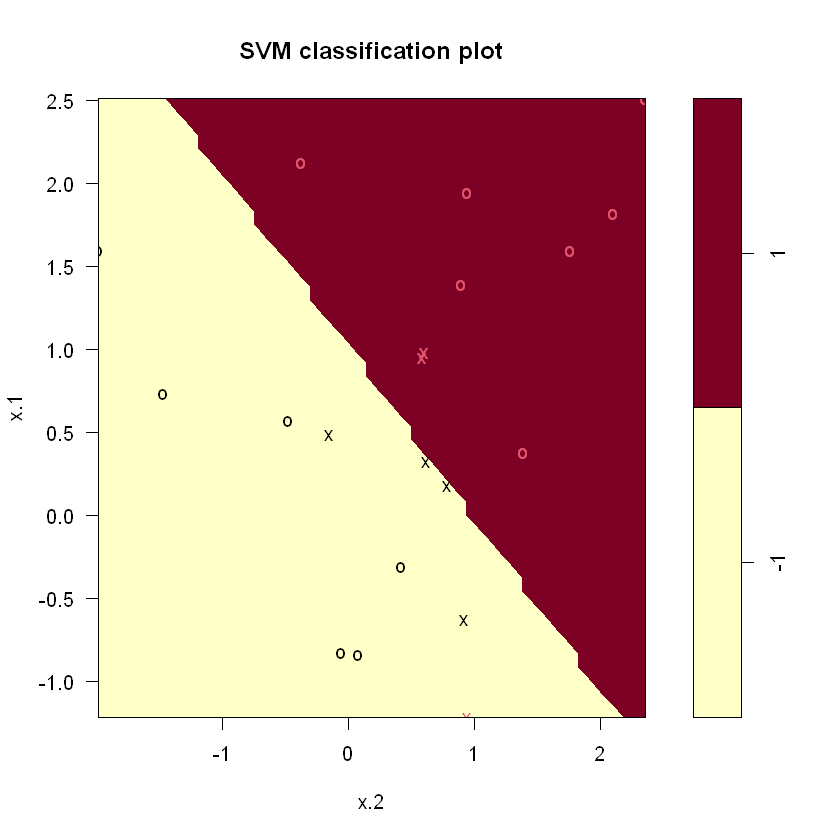

In [5]:
plot(svmfit , dat)

In [6]:
print(svmfit$index)

[1]  1  2  5  7 14 16 17


In [7]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




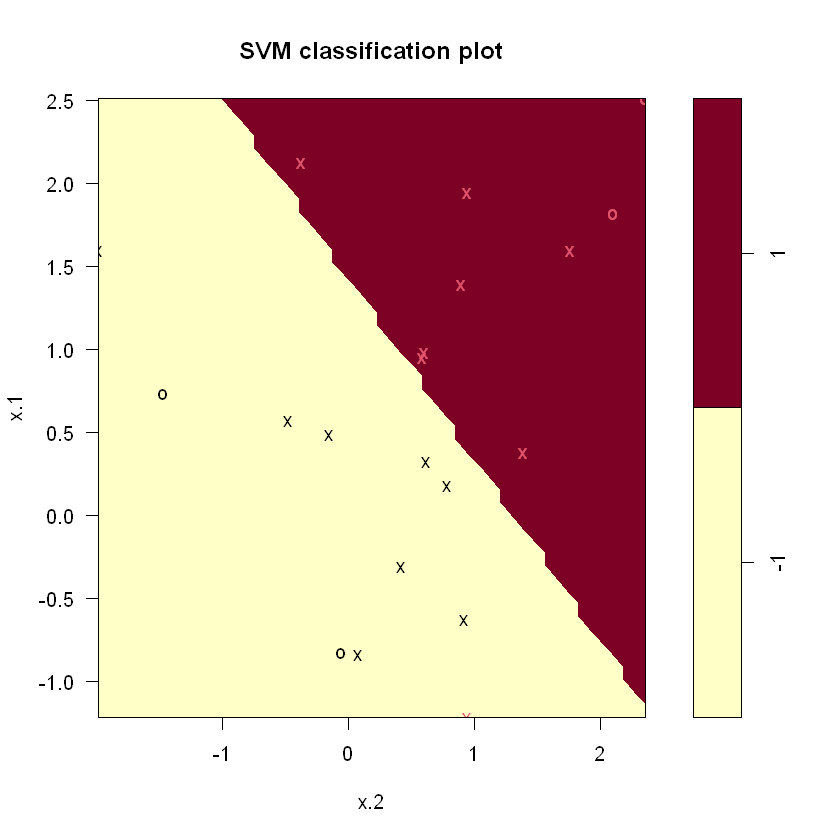

In [11]:
svmfit=svm(y~., data=dat , kernel ="linear", cost =0.1, scale=FALSE)
plot(svmfit , dat)

In [10]:
print(svmfit$index)

 [1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20


In [13]:
set.seed(1)
tune.out=tune(svm ,y~.,data=dat ,kernel ="linear",ranges=list(cost=c (0.001, 0.01, 0.1, 1,5,10,100) ))

In [15]:
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [17]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(METHOD = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [19]:
xtest=matrix(rnorm (20*2) , ncol=2)
ytest=sample (c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]= xtest[ytest==1,] + 1
testdat=data.frame(x= xtest , y=as.factor(ytest))

In [20]:
ypred=predict (bestmod ,testdat)
table(predict =ypred , truth=testdat$y )

       truth
predict -1 1
     -1  8 3
     1   4 5

In [22]:
svmfit=svm(y~., data=dat , kernel ="linear", cost =.01, scale=FALSE)
ypred=predict (svmfit ,testdat )
table(predict =ypred , truth=testdat$y )

       truth
predict -1  1
     -1 12  4
     1   0  4

In [23]:
x[y==1,]=x[y==1,]+0.5

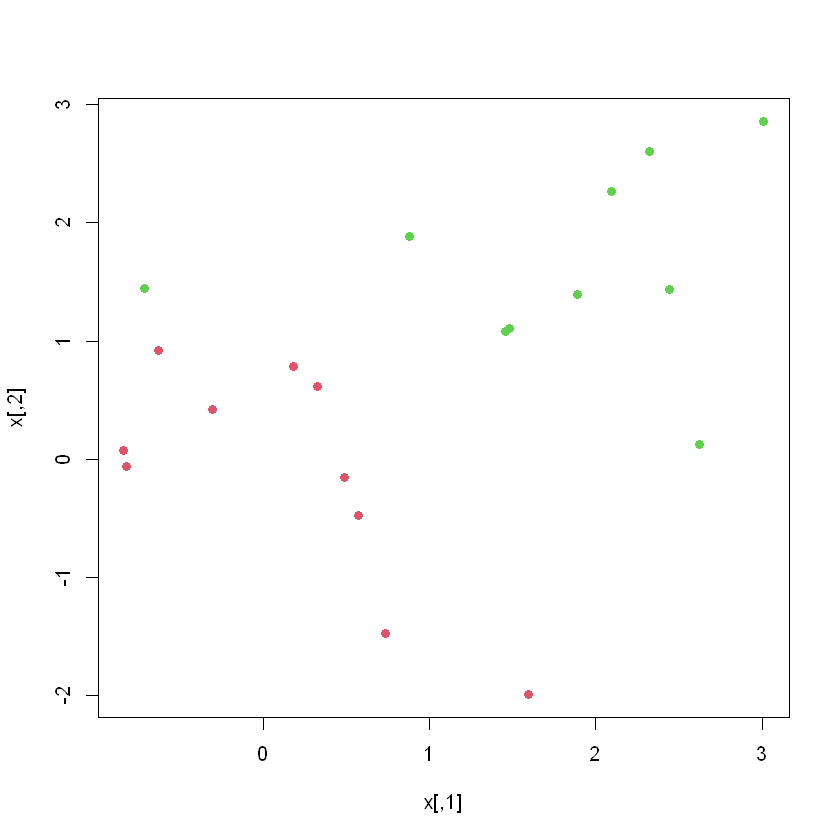

In [24]:
plot(x, col=(y+5)/2, pch =19)

In [25]:
dat=data.frame(x=x,y=as.factor(y))
svmfit=svm(y~., data=dat , kernel ="linear", cost=1e5)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




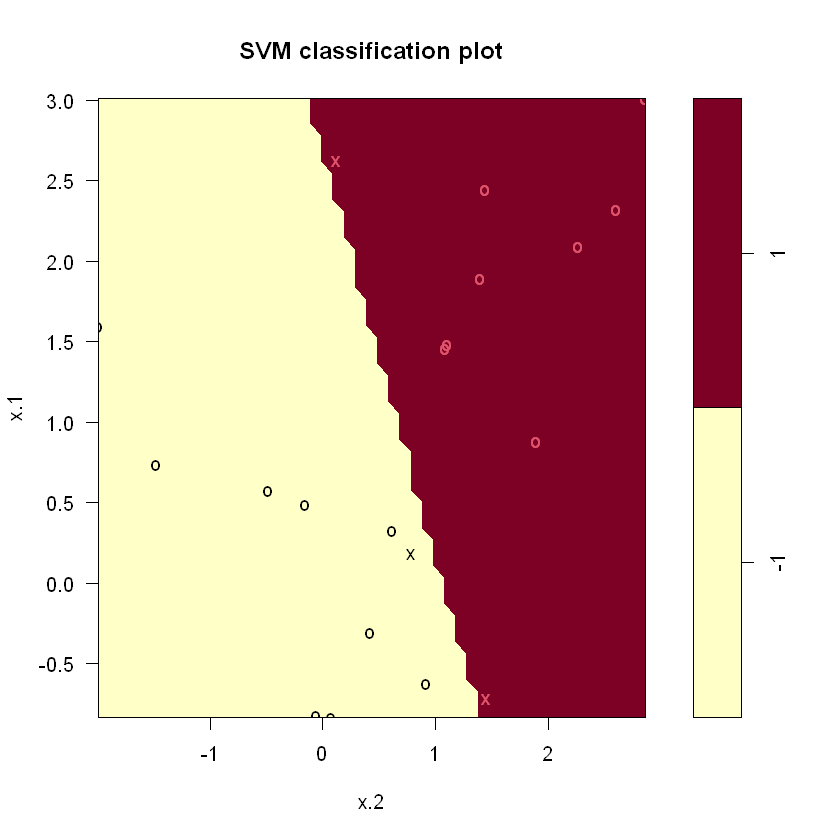

In [26]:
plot(svmfit , dat)

In [28]:
svmfit=svm(y~., data=dat , kernel ="linear", cost=1)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




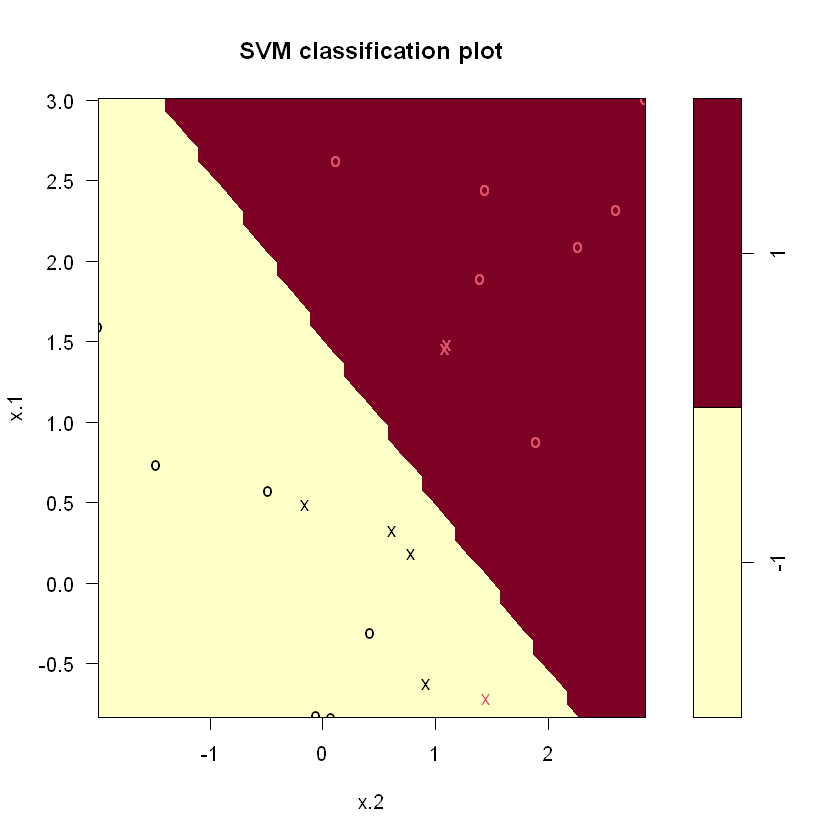

In [29]:
plot(svmfit ,dat)